In this notebook are described the steps to analyse data in the <strong>An Eye on Semantics</strong> paper.

Let's start by importing the packages we will need.

In [1]:
library(readxl)
library(lme4)
library(lmerTest)
library(languageR)
library(lattice)
library(BayesFactor)
library(ggeffects)
library(ggplot2)
library(performance)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'lme4' was built under R version 3.6.2"Loading required package: Matrix
Warning message:
"package 'lmerTest' was built under R version 3.6.3"
Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Warning message:
"package 'languageR' was built under R version 3.6.3"Warning message:
"package 'BayesFactor' was built under R version 3.6.3"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.6.3"************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************
Warning message:
"package 'ggeffects' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'performance' was built unde

In [2]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [3]:
citation('sjPlot')


Lüdecke D (2021). _sjPlot: Data Visualization for Statistics in Social
Science_. R package version 2.8.10, <URL:
https://CRAN.R-project.org/package=sjPlot>.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {sjPlot: Data Visualization for Statistics in Social Science},
    author = {Daniel Lüdecke},
    year = {2021},
    note = {R package version 2.8.10},
    url = {https://CRAN.R-project.org/package=sjPlot},
  }


# First Fixation Duration

## Basic Model

Import the dataset

In [4]:
FFD <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_ffd_41_final.csv')

Consider only values greater than 0, already selected during preprocessing fixations 80-600ms long.

In [5]:
FFD <- FFD[FFD$ms != 0, ]

In [6]:
colnames(FFD)

[1] "ms"                    "trialnr"               "time_before_ff"       
 [4] "regressed"             "n_tot_fix"             "n_prior_fix"          
 [7] "fixated"               "Word"                  "ID"                   
[10] "ConcM"                 "LEN"                   "UN2_F"                
[13] "UN3_F"                 "Orth"                  "OLD20"                
[16] "FreqCount"             "LogFreqZipf"           "V_MeanSum"            
[19] "A_MeanSum"             "mink3_SM"              "BLP_rt"               
[22] "BLP_accuracy"          "similarity"            "Position"             
[25] "PRECEDING_Frequency"   "PRECEDING_LogFreqZipf" "LENprec"              
[28] "Predictability"        "cloze"                 "plausibility"         
[31] "Sim"                   "Subject"               "Gender"               
[34] "Age"

Check which factors affect fixation durations, among those that are already established in the literature (excluding effects of interest).


In [7]:
summary(lmer(ms ~ trialnr + (1|ID) + (1|Subject), data = FFD))
# trial order does not influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ trialnr + (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123159.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7101 -0.6535 -0.1552  0.4681  5.5307 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  191.9   13.85   
 Subject  (Intercept)  589.7   24.28   
 Residual             4232.0   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.198e+02  4.100e+00 4.791e+01  53.623   <2e-16 ***
trialnr     4.262e-03  5.446e-03 1.079e+04   0.783    0.434    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
trialnr -0.264

In [8]:
summary(lmer(ms ~ LogFreqZipf + (1|ID) + (1|Subject), data = FFD))
# Zipf does influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123138.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6646 -0.6547 -0.1581  0.4670  5.4828 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  183.5   13.55   
 Subject  (Intercept)  589.9   24.29   
 Residual             4231.6   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 220.6507     3.9523  41.3582  55.828  < 2e-16 ***
LogFreqZipf  -3.1182     0.9196 392.2594  -3.391 0.000768 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
LogFreqZipf 0.003 

In [9]:
summary(lmer(ms ~ LEN + (1|ID) + (1|Subject), data = FFD))
# length does not influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LEN + (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123148.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6963 -0.6528 -0.1549  0.4677  5.5385 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  191.9   13.85   
 Subject  (Intercept)  589.6   24.28   
 Residual             4231.8   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 220.6371     3.9544  41.4754  55.795   <2e-16 ***
LEN           0.9759     0.9404 406.9997   1.038      0.3    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
LEN -0.010

In [10]:
summary(lmer(ms ~ PRECEDING_LogFreqZipf + (1|ID) + (1|Subject), data = FFD))
# Zipf of the preceding word does influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ PRECEDING_LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123143.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6810 -0.6548 -0.1528  0.4681  5.5097 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  187.6   13.70   
 Subject  (Intercept)  590.0   24.29   
 Residual             4231.7   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6791     3.9540  41.4077  55.811   <2e-16 ***
PRECEDING_LogFreqZipf  -2.3384     0.9288 398.3154  -2.518   0.0122 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
PRECEDING_L 0.000 

In [11]:
summary(lmer(ms ~  Position + (1|ID) + (1|Subject), data = FFD))
# position in the sentece does influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ Position + (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123144.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7246 -0.6551 -0.1553  0.4659  5.5544 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  188.1   13.71   
 Subject  (Intercept)  589.7   24.28   
 Residual             4231.8   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 220.6930     3.9531  41.4168  55.827   <2e-16 ***
Position      2.2157     0.9326 402.9945   2.376    0.018 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
Position 0.001 

In [12]:
summary(lmer(ms ~  time_before_ff + (1|ID) + (1|Subject), data = FFD))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ time_before_ff + (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123147.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6938 -0.6544 -0.1564  0.4654  5.5219 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  187.6   13.70   
 Subject  (Intercept)  589.8   24.29   
 Residual             4232.9   65.06   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     220.6859     3.9535   41.4120  55.821   <2e-16 ***
time_before_ff    1.2105     0.6706 8804.2172   1.805   0.0711 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
time_bfr_ff 0.001 

This is our <strong> basic model </strong> which will be used for model comparison, i.e., to check the influence of our predictors of interest <strong> concreteness </strong> and <strong> predictability </strong>

In [13]:
lmeBasicFFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + (1|ID) + (1|Subject), data = FFD)
summary(lmeBasicFFD)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + (1 | ID) +  
    (1 | Subject)
   Data: FFD

REML criterion at convergence: 123123.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6734 -0.6545 -0.1567  0.4712  5.4921 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  175.3   13.24   
 Subject  (Intercept)  589.8   24.29   
 Residual             4231.7   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6675     3.9495  41.2505  55.872  < 2e-16 ***
LogFreqZipf            -2.9641     0.9109 389.9325  -3.254  0.00124 ** 
PRECEDING_LogFreqZipf  -2.1980     0.9152 396.6044  -2.402  0.01678 *  
Position                2.3147     0.9158 401.8951   2.528  0.01187 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

## Predictability and Concreteness
Let's test predictability influence.

In [14]:
lmePredFFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position +  Sim +
                       + (1|ID) + (1|Subject), data = FFD)
anova(lmeBasicFFD, lmePredFFD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicFFD,7,123147.1,123198.3,-61566.57,123133.1,NA,NA,NA
lmePredFFD,8,123107.8,123166.2,-61545.89,123091.8,41.35329,1,1.270576e-10


Predictability has a significant influence on FFD.

Now we test whether concreteness influence FFD. 

In [16]:
lmeConcFFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + ConcM + (1|ID) + (1|Subject), data = FFD)
anova(lmeBasicFFD, lmeConcFFD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicFFD,7,123147.1,123198.3,-61566.57,123133.1,NA,NA,NA
lmeConcFFD,8,123138.9,123197.3,-61561.44,123122.9,10.26058,1,0.001359027


Concreteness has a significant influence on FFD.

Let's now check the joint influence of concreteness and predictability and test whether their effect is additive or interactive.

In [17]:
interaction_FFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim*ConcM + (1|ID) + (1|Subject), data = FFD)
additive_FFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + ConcM + (1|ID) + (1|Subject), data = FFD)

In [18]:
summary(additive_FFD, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + ConcM +  
    (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123074

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7211 -0.6523 -0.1532  0.4674  5.4547 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  140.0   11.83   
 Subject  (Intercept)  588.8   24.27   
 Residual             4231.8   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6139     3.9350  40.7916  56.064  < 2e-16 ***
LogFreqZipf            -1.8559     0.8758 385.8517  -2.119   0.0347 *  
PRECEDING_LogFreqZipf  -2.1898     0.8701 393.2857  -2.517   0.0122 *  
Position                2.1452     0.8662 399.9178   2.477   0.0137 *  
Sim                    -5.4925     0.8940 399.3

In [19]:
summary(interaction_FFD, corr=F) 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim * ConcM +  
    (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123072.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7199 -0.6525 -0.1518  0.4675  5.4544 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  140.7   11.86   
 Subject  (Intercept)  588.9   24.27   
 Residual             4231.7   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6810     3.9382  40.9156  56.036  < 2e-16 ***
LogFreqZipf            -1.8787     0.8782 385.2791  -2.139   0.0330 *  
PRECEDING_LogFreqZipf  -2.1323     0.8801 393.3182  -2.423   0.0159 *  
Position                2.0990     0.8731 399.3809   2.404   0.0167 *  
Sim                    -5.4243     0.9073 393

In [20]:
anova(interaction_FFD,additive_FFD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
additive_FFD,9,123104.4,123170.1,-61543.19,123086.4,NA,NA,NA
interaction_FFD,10,123106.2,123179.2,-61543.08,123086.2,0.2094683,1,0.6471845


We don't have evidence in support of an interactive influence of predictability and concreteness on FFD.
Let's visualize the confidence intervals of the estimates.

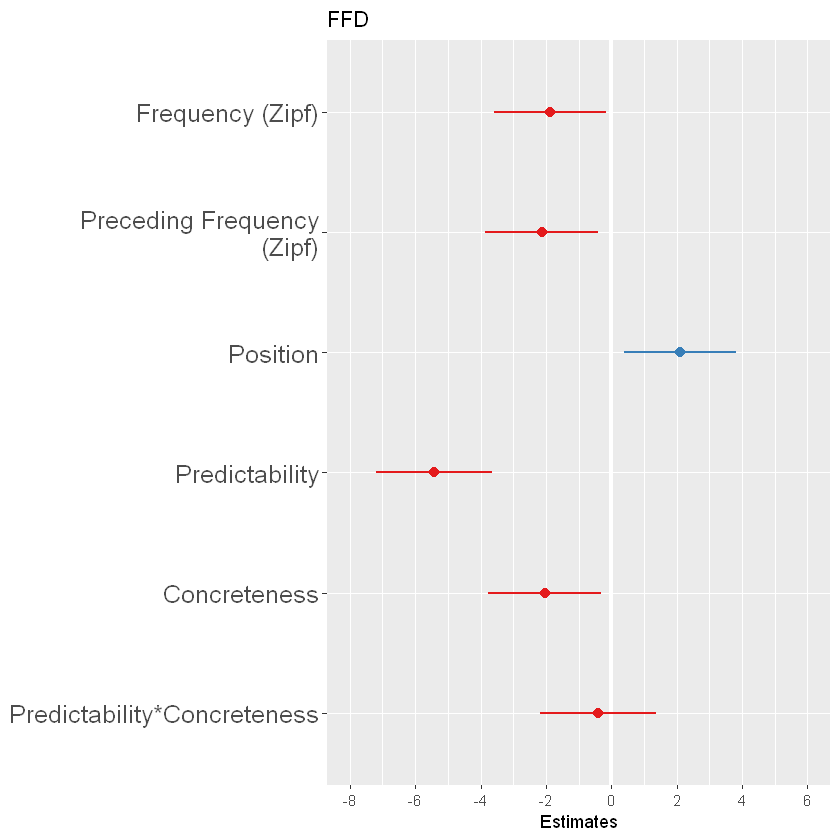

In [21]:
p <- sjPlot::plot_model(interaction_FFD, , title = "FFD",
                       axis.labels = c("Predictability*Concreteness",
                                       "Concreteness",
                                       "Predictability",
                                       "Position",
                                       "Preceding Frequency (Zipf)",
                                       "Frequency (Zipf)",
                                       "Intercept"))
p + sjPlot::font_size(labels.y = 15)

In [22]:
# options(repr.plot.width  = 6,
#        repr.plot.height = 6)

In order to better characterise the relationship between predictability and concreteness, and to compare it with the established additive influence of predictability and frequency, let's plot the predicted values for the response.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


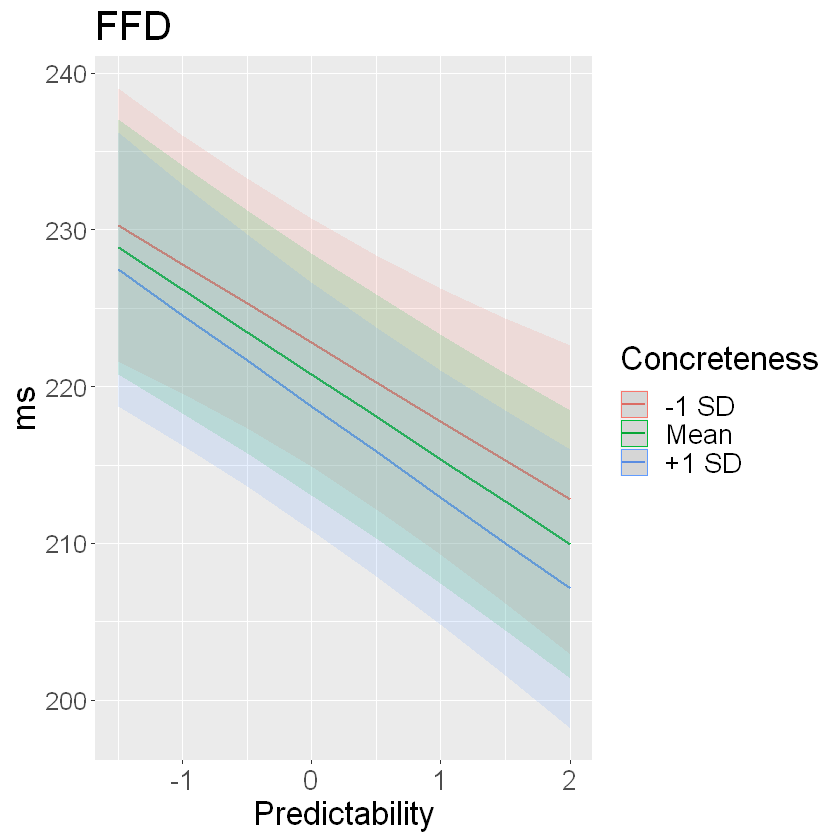

In [23]:
dfConcSim <- ggeffect(interaction_FFD, terms = c("Sim", "ConcM"))

p <- plot(dfConcSim) +
  labs(x="Predictability", colour="Concreteness", title = "FFD") +
  scale_color_discrete(labels = c("-1 SD", "Mean", "+1 SD"))
  
p + sjPlot::font_size(labels.y = 15) + theme(text=element_text(size=20))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


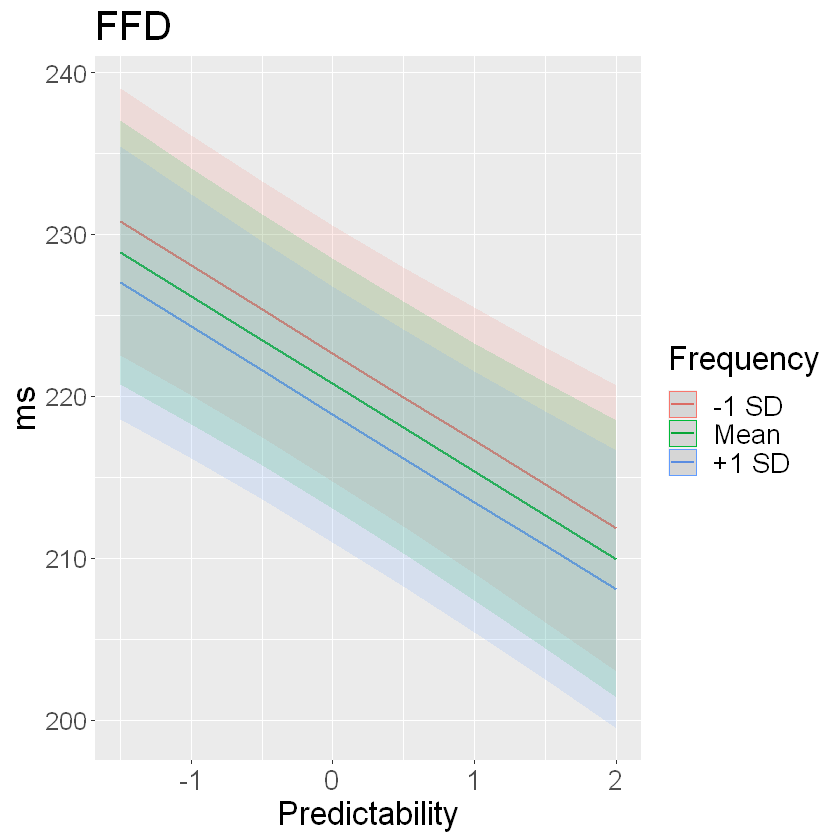

In [24]:
dfFreqSim <- ggeffect(interaction_FFD, terms = c("Sim", "LogFreqZipf"))

p <- plot(dfFreqSim) +
  labs(x="Predictability", colour="Frequency", title = "FFD") +
  scale_color_discrete(labels = c("-1 SD", "Mean", "+1 SD"))
  
p + sjPlot::font_size(labels.y = 15) + theme(text=element_text(size=20))

# Gaze Duration

## Basic Model

In [26]:
GD <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_gd_41_final.csv')
GD <- GD[GD$ms > 80, ]

In [27]:
summary(lmer(ms ~ trialnr + (1|ID) + (1|Subject), data = GD))
# The order of the trials does not influence GD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ trialnr + (1 | ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 129079.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5805 -0.6137 -0.1769  0.4040  9.8155 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  482.7   21.97   
 Subject  (Intercept)  969.4   31.13   
 Residual             7201.3   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.345e+02  5.305e+00 4.971e+01  44.200   <2e-16 ***
trialnr     2.830e-03  7.116e-03 1.075e+04   0.398    0.691    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
trialnr -0.266

In [28]:
summary(lmer(ms ~ LogFreqZipf + (1|ID) + (1|Subject), data = GD))
# LogFreqZipf influences GD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 129054.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5577 -0.6133 -0.1769  0.4035  9.7869 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  457.1   21.38   
 Subject  (Intercept)  969.7   31.14   
 Residual             7200.5   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  235.025      5.108  42.688  46.010  < 2e-16 ***
LogFreqZipf   -5.286      1.343 398.320  -3.936 9.76e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
LogFreqZipf 0.002 

In [29]:
summary(lmer(ms ~ LEN + (1|ID) + (1|Subject), data = GD))
# length influences GD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LEN + (1 | ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 129050.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5859 -0.6162 -0.1768  0.4079  9.8240 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  449.8   21.21   
 Subject  (Intercept)  969.5   31.14   
 Residual             7200.7   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  234.865      5.106  42.640  45.998  < 2e-16 ***
LEN            5.940      1.347 410.805   4.409 1.33e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
LEN -0.009

In [30]:
summary(lmer(ms ~ PRECEDING_LogFreqZipf + (1|ID) + (1|Subject), data = GD))
# preceding word logFreq influences GD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ PRECEDING_LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 129061.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5885 -0.6144 -0.1748  0.4057  9.8286 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  470.0   21.68   
 Subject  (Intercept)  969.5   31.14   
 Residual             7200.5   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            235.059      5.111  42.795  45.992  < 2e-16 ***
PRECEDING_LogFreqZipf   -3.908      1.359 403.668  -2.875  0.00425 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
PRECEDING_L 0.000 

In [31]:
summary(lmer(ms ~ Position + (1|ID) + (1|Subject), data = GD))
# Position marginally influences GD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ Position + (1 | ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 129065.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5913 -0.6142 -0.1771  0.4059  9.8218 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  477.6   21.85   
 Subject  (Intercept)  969.2   31.13   
 Residual             7200.7   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  235.069      5.112  42.859   45.98   <2e-16 ***
Position       2.684      1.370 407.168    1.96   0.0507 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
Position 0.001 

This is our <strong> basic model </strong> which will be used for model comparison, i.e., to check the influence of our predictors of interest <strong> concreteness </strong> and <strong> predictability </strong>

In [32]:
lmeBasicGD = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Position + (1|ID) + (1|Subject), data = GD)
summary(lmeBasicGD)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Position + (1 |  
    ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 129020.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5753 -0.6134 -0.1761  0.4068  9.8276 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  415.2   20.38   
 Subject  (Intercept)  969.0   31.13   
 Residual             7200.6   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            234.872      5.096  42.361  46.086  < 2e-16 ***
LogFreqZipf             -4.758      1.309 394.942  -3.636 0.000313 ***
LEN                      5.243      1.329 408.162   3.944 9.41e-05 ***
PRECEDING_LogFreqZipf   -2.915      1.324 399.824  -2.201 0.028280 *  
Position                 2.823      1.312 404.922   2.151 0

## Predictability and Concreteness

Let's test predictability influence on GD.

In [34]:
lmePredGD = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf +  Position + Sim +
                       + (1|ID) + (1|Subject), data = GD)
anova(lmeBasicGD, lmePredGD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicGD,8,129051.0,129109.4,-64517.48,129035.0,NA,NA,NA
lmePredGD,9,129001.7,129067.4,-64491.83,128983.7,51.31418,1,7.870502e-13


Predictability has a significant influence on GD.

Now, let's test concreteness influence on GD

In [35]:
lmeConcGD = lmer(ms ~ LogFreqZipf + LEN  + PRECEDING_LogFreqZipf + Position +  ConcM + (1|ID) + (1|Subject), data = GD)
anova(lmeBasicGD,lmeConcGD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicGD,8,129051.0,129109.4,-64517.48,129035.0,NA,NA,NA
lmeConcGD,9,129048.9,129114.6,-64515.44,129030.9,4.087823,1,0.04319325


Concreteness has a significant influence on GD.

Let's now check the joint influence of concreteness and predictability and test whether their effect is additive or interactive.

In [36]:
additive_GD = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Position + Sim + ConcM +
                   + (1|ID) + (1|Subject), data = GD)
interaction_GD = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Position + Sim * ConcM 
                      + (1|ID) + (1|Subject), data = GD)

In [37]:
summary(additive_GD, corr=F) 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Position + Sim +  
    ConcM + +(1 | ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 128964.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5848 -0.6157 -0.1749  0.4016  9.9264 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  334.4   18.29   
 Subject  (Intercept)  967.6   31.11   
 Residual             7200.7   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            234.834      5.073  41.715  46.291  < 2e-16 ***
LogFreqZipf             -3.044      1.250 390.984  -2.436 0.015285 *  
LEN                      5.007      1.281 405.488   3.910 0.000108 ***
PRECEDING_LogFreqZipf   -3.139      1.247 396.846  -2.517 0.012240 *  
Position                 2.560      1.233 40

In [38]:
check_collinearity(additive_GD)

Term,VIF,SE_factor
LogFreqZipf,1.044606,1.022060
LEN,1.075676,1.037148
PRECEDING_LogFreqZipf,1.032946,1.016340
Position,1.002286,1.001142
Sim,1.067014,1.032964
ConcM,1.093819,1.045858


In [39]:
summary(interaction_GD, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Position + Sim *  
    ConcM + (1 | ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 128961.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5844 -0.6161 -0.1747  0.4017  9.9276 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  335.9   18.33   
 Subject  (Intercept)  967.6   31.11   
 Residual             7200.7   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           234.8645     5.0779  41.8726  46.253  < 2e-16 ***
LogFreqZipf            -3.0550     1.2533 390.2117  -2.438 0.015229 *  
LEN                     5.0029     1.2825 404.4666   3.901 0.000112 ***
PRECEDING_LogFreqZipf  -3.1129     1.2612 396.5866  -2.468 0.013998 *  
Position                2.5382     1.242

In [40]:
anova(interaction_GD, additive_GD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
additive_GD,10,129002.8,129075.8,-64491.40,128982.8,NA,NA,NA
interaction_GD,11,129004.8,129085.1,-64491.39,128982.8,0.02173601,1,0.8827915


When including both concreteness and predictaibility in the model, concreteness is no more a significant predictor. However this is not due to collinearity in the model (vif close to 1). We cannot be sure why this is the case.

When comparing the additive and interactive model, we don't have evidence in support of an interactive influence of predictability and concreteness on GD.

# Probability of Fixating a Word

## Basic Model

In [41]:
PrF <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_gd_41_final.csv')

Note that we are predicting the column 'fixated', where it is stored whether a word was fixated first pass or not (fixations shorte than 80ms conts as skipped, fixated longer than 600ms not entered the analysis)

In [44]:
summary(lmer(fixated ~ LogFreqZipf + (1|ID) + (1|Subject), data = PrF))
# LogFreqZipf influences p(fixation)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fixated ~ LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: PrF

REML criterion at convergence: 18306.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4300 -1.0205  0.4070  0.6869  1.9456 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.005774 0.07599 
 Subject  (Intercept) 0.022250 0.14916 
 Residual             0.182441 0.42713 
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   0.700377   0.024131  41.006782  29.023  < 2e-16 ***
LogFreqZipf  -0.016658   0.005114 396.929952  -3.257  0.00122 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
LogFreqZipf 0.000 

In [51]:
summary(lmer(fixated ~ LEN + (1|ID) + (1|Subject), data = PrF))
# length influences p(Fixation)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fixated ~ LEN + (1 | ID) + (1 | Subject)
   Data: PrF

REML criterion at convergence: 18121.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4460 -1.0194  0.4047  0.6932  1.9432 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001898 0.04357 
 Subject  (Intercept) 0.022279 0.14926 
 Residual             0.182448 0.42714 
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 7.004e-01  2.395e-02 3.966e+01   29.25   <2e-16 ***
LEN         6.425e-02  4.052e-03 3.951e+02   15.85   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
LEN 0.000 

In [46]:
summary(lmer(fixated ~ PRECEDING_LogFreqZipf + (1|ID) + (1|Subject), data = PrF))
# predecing word freq does not influence p(Fixation)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fixated ~ PRECEDING_LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: PrF

REML criterion at convergence: 18315.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4319 -1.0171  0.4057  0.6852  1.9545 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.006033 0.07767 
 Subject  (Intercept) 0.022250 0.14917 
 Residual             0.182441 0.42713 
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)             0.700385   0.024145  41.097232  29.007   <2e-16 ***
PRECEDING_LogFreqZipf  -0.004339   0.005179 397.471100  -0.838    0.403    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
PRECEDING_L 0.000 

In [47]:
summary(lmer(fixated ~  Position + (1|ID) + (1|Subject), data = PrF))
# position does not influence p(Fixation)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fixated ~ Position + (1 | ID) + (1 | Subject)
   Data: PrF

REML criterion at convergence: 18314.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4382 -1.0204  0.4057  0.6869  1.9652 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.006007 0.07751 
 Subject  (Intercept) 0.022251 0.14917 
 Residual             0.182441 0.42713 
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   0.700379   0.024144  41.087996  29.008   <2e-16 ***
Position     -0.006753   0.005172 397.353306  -1.306    0.192    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
Position 0.000 

This is our <strong> basic model </strong> which will be used for model comparison, i.e., to check the influence of our predictors of interest <strong> concreteness </strong> and <strong> predictability </strong>

In [54]:
lmeBasicPrF = lmer(fixated ~ LogFreqZipf + LEN + (1|ID) + (1|Subject), data = PrF)
summary(lmeBasicPrF, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fixated ~ LogFreqZipf + LEN + (1 | ID) + (1 | Subject)
   Data: PrF

REML criterion at convergence: 18121

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4208 -1.0256  0.4039  0.6935  1.9325 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001751 0.04185 
 Subject  (Intercept) 0.022280 0.14927 
 Residual             0.182447 0.42714 
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   0.700437   0.023938  39.607180  29.260  < 2e-16 ***
LogFreqZipf  -0.012791   0.004016 394.809664  -3.185  0.00156 ** 
LEN           0.063472   0.004014 394.106917  15.813  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## Predictability and Concreteness

Let's test predictability influence on PrF.

In [55]:
lmePredPrF = lmer(fixated ~ LogFreqZipf + LEN + Sim +
                       (1|ID) + (1|Subject), data = PrF)

anova(lmeBasicPrF, lmePredPrF )


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicPrF,6,18109.00,18154.96,-9048.499,18097.00,NA,NA,NA
lmePredPrF,7,18097.06,18150.68,-9041.530,18083.06,13.93922,1,0.0001888175


Predictability has a significant influence on PrF.

Now, let's test concreteness influence on PrF.

In [56]:
lmeConcPrF = lmer(fixated ~ LogFreqZipf + LEN + ConcM + (1|ID) + (1|Subject), data = PrF)
anova(lmeBasicPrF, lmeConcPrF)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicPrF,6,18109.00,18154.96,-9048.499,18097.00,NA,NA,NA
lmeConcPrF,7,18109.41,18163.03,-9047.703,18095.41,1.592092,1,0.2070276


Concretness has no significant influence on PrF.

Let's check whether they have a joint influence on PrF.

In [57]:
additive_PrF = lmer(fixated ~ LogFreqZipf + LEN + Sim + ConcM + (1|ID) + (1|Subject), data = PrF)
interactive_PrF = lmer(fixated ~ LogFreqZipf + LEN + Sim * ConcM + (1|ID) + (1|Subject), data = PrF)

In [58]:
summary(additive_PrF, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fixated ~ LogFreqZipf + LEN + Sim + ConcM + (1 | ID) + (1 | Subject)
   Data: PrF

REML criterion at convergence: 18125.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4276 -1.0283  0.4035  0.6939  1.9677 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001556 0.03945 
 Subject  (Intercept) 0.022285 0.14928 
 Residual             0.182447 0.42714 
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   0.700436   0.023930  39.540669  29.270  < 2e-16 ***
LogFreqZipf  -0.009945   0.004025 393.027499  -2.471 0.013905 *  
LEN           0.063020   0.004069 392.506488  15.488  < 2e-16 ***
Sim          -0.014612   0.004076 392.904424  -3.585 0.000379 ***
ConcM        -0.002697   0.004124 393.267383  -0.654 0.513520    
---
Signif. codes:  0 '***' 0.001 '**' 0

In [59]:
summary(interactive_PrF, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fixated ~ LogFreqZipf + LEN + Sim * ConcM + (1 | ID) + (1 | Subject)
   Data: PrF

REML criterion at convergence: 18134.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4271 -1.0279  0.4026  0.6940  1.9707 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001572 0.03964 
 Subject  (Intercept) 0.022285 0.14928 
 Residual             0.182447 0.42714 
Number of obs: 15676, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  7.006e-01  2.394e-02  3.961e+01  29.263  < 2e-16 ***
LogFreqZipf -9.987e-03  4.034e-03  3.922e+02  -2.475 0.013736 *  
LEN          6.299e-02  4.076e-03  3.915e+02  15.453  < 2e-16 ***
Sim         -1.445e-02  4.150e-03  3.919e+02  -3.482 0.000553 ***
ConcM       -2.667e-03  4.131e-03  3.923e+02  -0.646 0.518915    
Sim:ConcM   -8.733e-04  4.043e-03  3.929

When including both concreteness and predictaibility in the model, concreteness is still not a significant predictor not in the additive nore interactive model.

# Exploratory Analyses on FFD
## Context Effects

Let's check if other context level characteristics influence FFD beyond predictability.

#### Plausibility

In [62]:
interaction_FFD_withplausibility = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + plausibility +
                                                Sim*ConcM + (1|ID) + (1|Subject), data = FFD)
summary(interaction_FFD_withplausibility, corr=F) 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + plausibility +  
    Sim * ConcM + (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123065.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7393 -0.6512 -0.1527  0.4705  5.4687 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  138.0   11.75   
 Subject  (Intercept)  589.2   24.27   
 Residual             4231.6   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6475     3.9384  40.8780  56.025  < 2e-16 ***
LogFreqZipf            -1.7846     0.8751 384.4751  -2.039 0.042109 *  
PRECEDING_LogFreqZipf  -2.0868     0.8763 392.7678  -2.381 0.017720 *  
Position                2.0785     0.8691 398.7497   2.391 0.017247 *  
plausibility           -2.3917

#### Semantic Similarity with context of the sentence

In [64]:
interaction_FFD_withsimilarity = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + similarity +
                                                Sim*ConcM + (1|ID) + (1|Subject), data = FFD)
summary(interaction_FFD_withsimilarity, corr=F) 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + similarity +  
    Sim * ConcM + (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123070.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7203 -0.6525 -0.1517  0.4674  5.4555 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  141.4   11.89   
 Subject  (Intercept)  588.9   24.27   
 Residual             4231.7   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6833     3.9385  40.9289  56.032  < 2e-16 ***
LogFreqZipf            -1.8656     0.8883 385.4112  -2.100   0.0364 *  
PRECEDING_LogFreqZipf  -2.1264     0.8830 392.6439  -2.408   0.0165 *  
Position                2.1059     0.8768 398.1550   2.402   0.0168 *  
similarity              0.1118  

In [66]:
check_collinearity(interaction_FFD_withsimilarity)

Term,VIF,SE_factor
LogFreqZipf,1.066754,1.032838
PRECEDING_LogFreqZipf,1.044632,1.022072
Position,1.021987,1.010934
similarity,1.501135,1.225208
Sim,1.514119,1.230496
ConcM,1.046329,1.022902
Sim:ConcM,1.086175,1.042197


## Single-Word (semantic) effects
### Alternatives to Concreteness

#### Sensorimotor Strength

In [68]:
lmeSMFFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + mink3_SM + (1|ID) + (1|Subject), data = FFD)
anova(lmeBasicFFD, lmeSMFFD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicFFD,7,123147.1,123198.3,-61566.57,123133.1,NA,NA,NA
lmeSMFFD,8,123145.9,123204.3,-61564.93,123129.9,3.270434,1,0.07053898


Marginal influence of sensorimotr strength on FFD.

In [80]:
summary(lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + mink3_SM*Sim + (1|ID) + (1|Subject), data = FFD), corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + mink3_SM *  
    Sim + (1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123076.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7188 -0.6502 -0.1528  0.4689  5.4624 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  143.9   12.00   
 Subject  (Intercept)  589.7   24.28   
 Residual             4231.7   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.7036     3.9422  40.9745  55.984  < 2e-16 ***
LogFreqZipf            -1.7815     0.8871 385.5637  -2.008  0.04532 *  
PRECEDING_LogFreqZipf  -2.3707     0.8747 393.4544  -2.710  0.00702 ** 
Position                2.0951     0.8787 399.5344   2.384  0.01758 *  
mink3_SM               -0.9299     0.9008 

#### Semantic Diversity 

We need are uploading a subset of the data, as we did not have semantic Diversity scores for 4 of the 400 stimuli.

In [75]:
FFD2 <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_ffd_41_withSemDAoA.csv')

In [76]:
FFD2 <- FFD2[FFD2$ms != 0, ]

In [77]:
colnames(FFD2)

[1] "ms"                    "trialnr"               "time_before_ff"       
 [4] "regressed"             "n_tot_fix"             "n_prior_fix"          
 [7] "Word"                  "ID"                    "ConcM"                
[10] "LEN"                   "UN2_F"                 "UN3_F"                
[13] "Orth"                  "OLD20"                 "FreqCount"            
[16] "LogFreqZipf"           "V_MeanSum"             "A_MeanSum"            
[19] "mink3_SM"              "BLP_rt"                "BLP_accuracy"         
[22] "similarity"            "Position"              "PRECEDING_Frequency"  
[25] "PRECEDING_LogFreqZipf" "LENprec"               "Predictability"       
[28] "cloze"                 "plausibility"          "Sim"                  
[31] "SemD"                  "AoA"                   "Subject"              
[34] "Gender"                "Age"

In [88]:
lmeBasicFFD2 = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + (1|ID) + (1|Subject), data = FFD2)

In [89]:
lmeSemDFFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + SemD + (1|ID) + (1|Subject), data = FFD2)
anova(lmeBasicFFD2, lmeSemDFFD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicFFD2,7,122201.1,122252.2,-61093.56,122187.1,NA,NA,NA
lmeSemDFFD,8,122199.7,122258.1,-61091.85,122183.7,3.425694,1,0.06418925


Marginal influence of semantic diversity on FFD.

In [92]:
summary(lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + SemD*Sim + (1|ID) + (1|Subject), data = FFD2), corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + SemD *  
    Sim + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 122130.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7185 -0.6506 -0.1539  0.4678  5.4545 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  145.4   12.06   
 Subject  (Intercept)  591.3   24.32   
 Residual             4229.2   65.03   
Number of obs: 10882, groups:  ID, 397; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6946     3.9463  40.9036  55.925  < 2e-16 ***
LogFreqZipf            -2.1249     0.9782 387.7742  -2.172  0.03044 *  
PRECEDING_LogFreqZipf  -2.2949     0.8802 390.2116  -2.607  0.00947 ** 
Position                2.0830     0.8831 396.1248   2.359  0.01883 *  
SemD                    0.6482     0.9589 383

#### Age of Acquisition

In [93]:
lmeAoAFFD = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + AoA + (1|ID) + (1|Subject), data = FFD2)
anova(lmeBasicFFD2, lmeAoAFFD)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicFFD2,7,122201.1,122252.2,-61093.56,122187.1,NA,NA,NA
lmeAoAFFD,8,122199.5,122257.9,-61091.75,122183.5,3.624936,1,0.05691975


Marginal influence of age of acquisition on FFD.

In [94]:
summary(lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + AoA*Sim + (1|ID) + (1|Subject), data = FFD2), corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + AoA * Sim +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 122129.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7188 -0.6510 -0.1519  0.4691  5.4589 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  145.3   12.05   
 Subject  (Intercept)  591.0   24.31   
 Residual             4229.2   65.03   
Number of obs: 10882, groups:  ID, 397; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6264     3.9466  40.9589  55.903  < 2e-16 ***
LogFreqZipf            -1.5066     0.9477 381.5770  -1.590   0.1127    
PRECEDING_LogFreqZipf  -2.2771     0.8831 390.4993  -2.579   0.0103 *  
Position                2.2112     0.8921 396.2514   2.478   0.0136 *  
AoA                     1.2990     0.9464 378.

Overall, it seems that concreteness was the better semantic predictor in our dataset.

### Other Possible covariates

#### Valence

In [96]:
lmeValenceFFD = lmer(ms ~ V_MeanSum + LogFreqZipf + PRECEDING_LogFreqZipf + Position + plausibility + Sim*ConcM + 
                     + (1|ID) + (1|Subject), data = FFD)
summary(lmeValenceFFD, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ V_MeanSum + LogFreqZipf + PRECEDING_LogFreqZipf + Position +  
    plausibility + Sim * ConcM + +(1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123063.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7409 -0.6501 -0.1514  0.4691  5.4700 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  138.4   11.76   
 Subject  (Intercept)  589.2   24.27   
 Residual             4231.6   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6463     3.9387  40.8844  56.020  < 2e-16 ***
V_MeanSum               0.6421     0.9058 388.2320   0.709 0.478794    
LogFreqZipf            -1.9742     0.9157 385.3195  -2.156 0.031699 *  
PRECEDING_LogFreqZipf  -2.0979     0.8770 391.7139  -2.392 0.017227 *  
Position         

#### Arousal

In [97]:
lmeArousalFFD = lmer(ms ~ A_MeanSum + LogFreqZipf + PRECEDING_LogFreqZipf + Position + plausibility + Sim*ConcM +
                     + (1|ID) + (1|Subject), data = FFD)
summary(lmeArousalFFD, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ A_MeanSum + LogFreqZipf + PRECEDING_LogFreqZipf + Position +  
    plausibility + Sim * ConcM + +(1 | ID) + (1 | Subject)
   Data: FFD

REML criterion at convergence: 123062.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7482 -0.6511 -0.1534  0.4710  5.4651 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  137.9   11.74   
 Subject  (Intercept)  589.1   24.27   
 Residual             4231.6   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6552     3.9380  40.8770  56.032  < 2e-16 ***
A_MeanSum              -0.9987     0.9015 394.1924  -1.108 0.268626    
LogFreqZipf            -1.7291     0.8764 384.0195  -1.973 0.049225 *  
PRECEDING_LogFreqZipf  -2.0697     0.8763 392.1118  -2.362 0.018668 *  
Position         

Nor valence nor arousal are significant predictors of FFD.
Importantly, the presence of a concreteness effect is still relevant when including either of the covariates.

# Exploratory Analyses on GD

Exploring whether we replicate Sheikh and Titone's (2013) relationship between valence/aroudal, frequency, and concreteness.

#### Frequency * Concreteness * Arousal

In [73]:
interaction_sheikhtitone1GD = lmer(ms ~ LogFreqZipf*A_MeanSum*ConcM + LEN + PRECEDING_LogFreqZipf + Position +
                               + Sim  + (1|ID) + (1|Subject), data = GD)
summary(interaction_sheikhtitone1GD, corr=F)                               

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf * A_MeanSum * ConcM + LEN + PRECEDING_LogFreqZipf +  
    Position + +Sim + (1 | ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 128942.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5628 -0.6155 -0.1743  0.4034  9.9150 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  328.3   18.12   
 Subject  (Intercept)  967.9   31.11   
 Residual             7200.6   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)                  234.373      5.090  42.255  46.043  < 2e-16 ***
LogFreqZipf                   -2.190      1.279 389.506  -1.712 0.087768 .  
A_MeanSum                     -1.151      1.302 393.255  -0.884 0.377304    
ConcM                         -1.936      1.383 395.760  -1.400 0.162390    
LE

#### Frequency * Concreteness * Valence

In [74]:
interaction_sheikhtitone2GD = lmer(ms ~ LogFreqZipf*V_MeanSum*ConcM + LEN + PRECEDING_LogFreqZipf + Position +
                               + Sim  + (1|ID) + (1|Subject), data = GD)
summary(interaction_sheikhtitone2GD, corr=F)       

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf * V_MeanSum * ConcM + LEN + PRECEDING_LogFreqZipf +  
    Position + +Sim + (1 | ID) + (1 | Subject)
   Data: GD

REML criterion at convergence: 128942.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5892 -0.6148 -0.1743  0.4019  9.9327 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  327.8   18.11   
 Subject  (Intercept)  968.0   31.11   
 Residual             7200.5   84.86   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)                  234.102      5.088  42.167  46.013  < 2e-16 ***
LogFreqZipf                   -3.449      1.321 389.650  -2.610  0.00941 ** 
V_MeanSum                      2.989      1.405 401.503   2.128  0.03397 *  
ConcM                         -1.078      1.374 398.164  -0.785  0.43313    
LE

We do observe a frequency * arousal * concreteness interaction